# Importing Libraries

**tensorflow,numpy,pandas,matplotlib**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# data preprocessing

**dataset name : New plant diseases dataset** from kaggle

### Training image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


## validation image preprocessing


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
# training_set

In [5]:
# for x,y in training_set:
#     print(x,type(x))
#     print(y,type(y))
#     break

# MODEL BUILDING
    

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

### Building convolutional layer



In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\vigne\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) #dropping 25%

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation="relu"))

In [16]:
model.add(Dropout(0.4)) #dropping 40%

In [17]:
#output layer
model.add(Dense(units=38,activation='softmax'))

# Compiling model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# MODEL TRAINING

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1882s 856ms/step - accuracy: 0.3928 - loss: 2.1542 - val_accuracy: 0.8372 - val_loss: 0.5231
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1874s 853ms/step - accuracy: 0.8336 - loss: 0.5253 - val_accuracy: 0.8932 - val_loss: 0.3388
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2064s 939ms/step - accuracy: 0.9032 - loss: 0.3007 - val_accuracy: 0.9231 - val_loss: 0.2395
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1836s 836ms/step - accuracy: 0.9320 - loss: 0.2052 - val_accuracy: 0.9500 - val_loss: 0.1537
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1827s 831ms/step - accuracy: 0.9510 - loss: 0.1507 - val_accuracy: 0.9236 - val_loss: 0.2510
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1824s 830ms/step - accuracy: 0.9612 - loss: 0.1140 - val_accuracy: 0.9567 - val_loss: 0.1402
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1810s 824ms/step - accuracy: 0.9678 - loss: 0.0985 - val_accuracy: 0.9579 - val_loss: 0.1378
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1795s 811ms/s

# model evaluation

In [21]:
#training set
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 847s 385ms/step - accuracy: 0.9873 - loss: 0.0376
Training accuracy: 0.9884486794471741


In [22]:
#validation set
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 212s 385ms/step - accuracy: 0.9618 - loss: 0.1277
Validation accuracy: 0.9626678824424744


# Saving Model

In [27]:
model.save('trained_model.keras')

In [28]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5935984253883362,
  0.8574293851852417,
  0.9120990037918091,
  0.9385020136833191,
  0.9543921947479248,
  0.9640088081359863,
  0.9696991443634033,
  0.9744505286216736,
  0.9796998500823975,
  0.9811508655548096],
 'loss': [1.379740834236145,
  0.44734010100364685,
  0.2716275155544281,
  0.18818672001361847,
  0.1410217583179474,
  0.1074984222650528,
  0.09290206432342529,
  0.07935060560703278,
  0.06389036774635315,
  0.05906275659799576],
 'val_accuracy': [0.8372410535812378,
  0.8932392597198486,
  0.9231163263320923,
  0.9499772191047668,
  0.9236285090446472,
  0.9566924571990967,
  0.9578875303268433,
  0.9583997130393982,
  0.9613020420074463,
  0.9626678824424744],
 'val_loss': [0.5230982899665833,
  0.3387795090675354,
  0.23949189484119415,
  0.15370644629001617,
  0.2509829103946686,
  0.14016757905483246,
  0.13781239092350006,
  0.13922739028930664,
  0.1333875060081482,
  0.1274103820323944]}

In [29]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [30]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Accuracy visualization

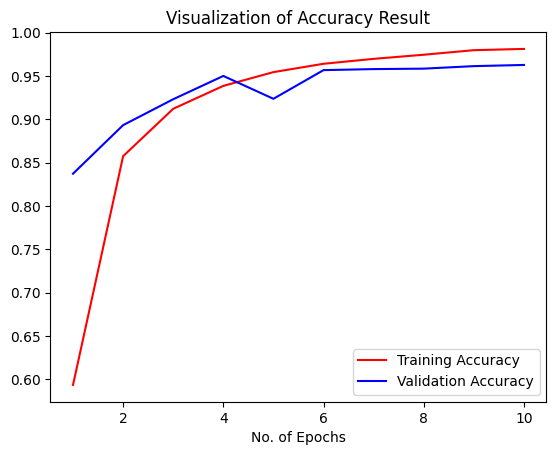

In [31]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

# Some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 383s 22ms/step


(array([[1.0000000e+00, 1.8698142e-08, 9.5512584e-13, ..., 3.3017237e-19,
         9.1043667e-18, 9.7696918e-16],
        [9.9998617e-01, 1.2529119e-05, 2.7413874e-08, ..., 1.5312635e-12,
         2.2333800e-11, 6.6762218e-10],
        [1.0000000e+00, 1.0114811e-11, 1.6195089e-14, ..., 1.1741558e-22,
         1.3527257e-20, 1.6857974e-17],
        ...,
        [3.5529847e-15, 6.5762890e-19, 1.2010576e-12, ..., 1.3461556e-15,
         9.6311054e-18, 1.0000000e+00],
        [9.8315948e-14, 9.1562303e-17, 1.5752367e-10, ..., 1.3530348e-13,
         1.8897491e-15, 1.0000000e+00],
        [1.3839896e-15, 2.6384888e-17, 1.5600613e-15, ..., 2.8944417e-18,
         3.7873278e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [36]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [37]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [38]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

In [42]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.97      0.96       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.99       440
                                   Apple___healthy       0.97      0.94      0.96       502
                               Blueberry___healthy       0.97      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.94      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.93      0.

In [45]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[487,   4,   0, ...,   0,   0,   0],
       [  0, 493,   0, ...,   0,   0,   0],
       [  0,   0, 434, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   0, ...,   0,   0, 468]], dtype=int64)

# Confusion Matrix Visualization

<Axes: >

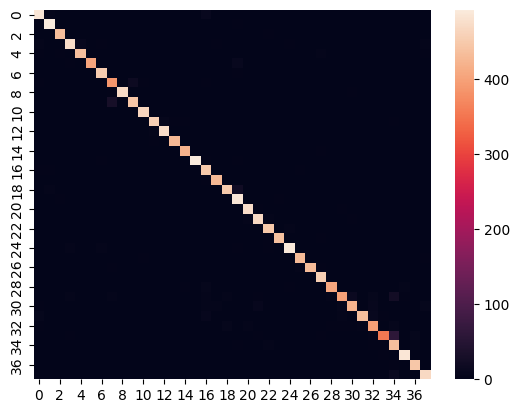

In [46]:
sns.heatmap(cm)

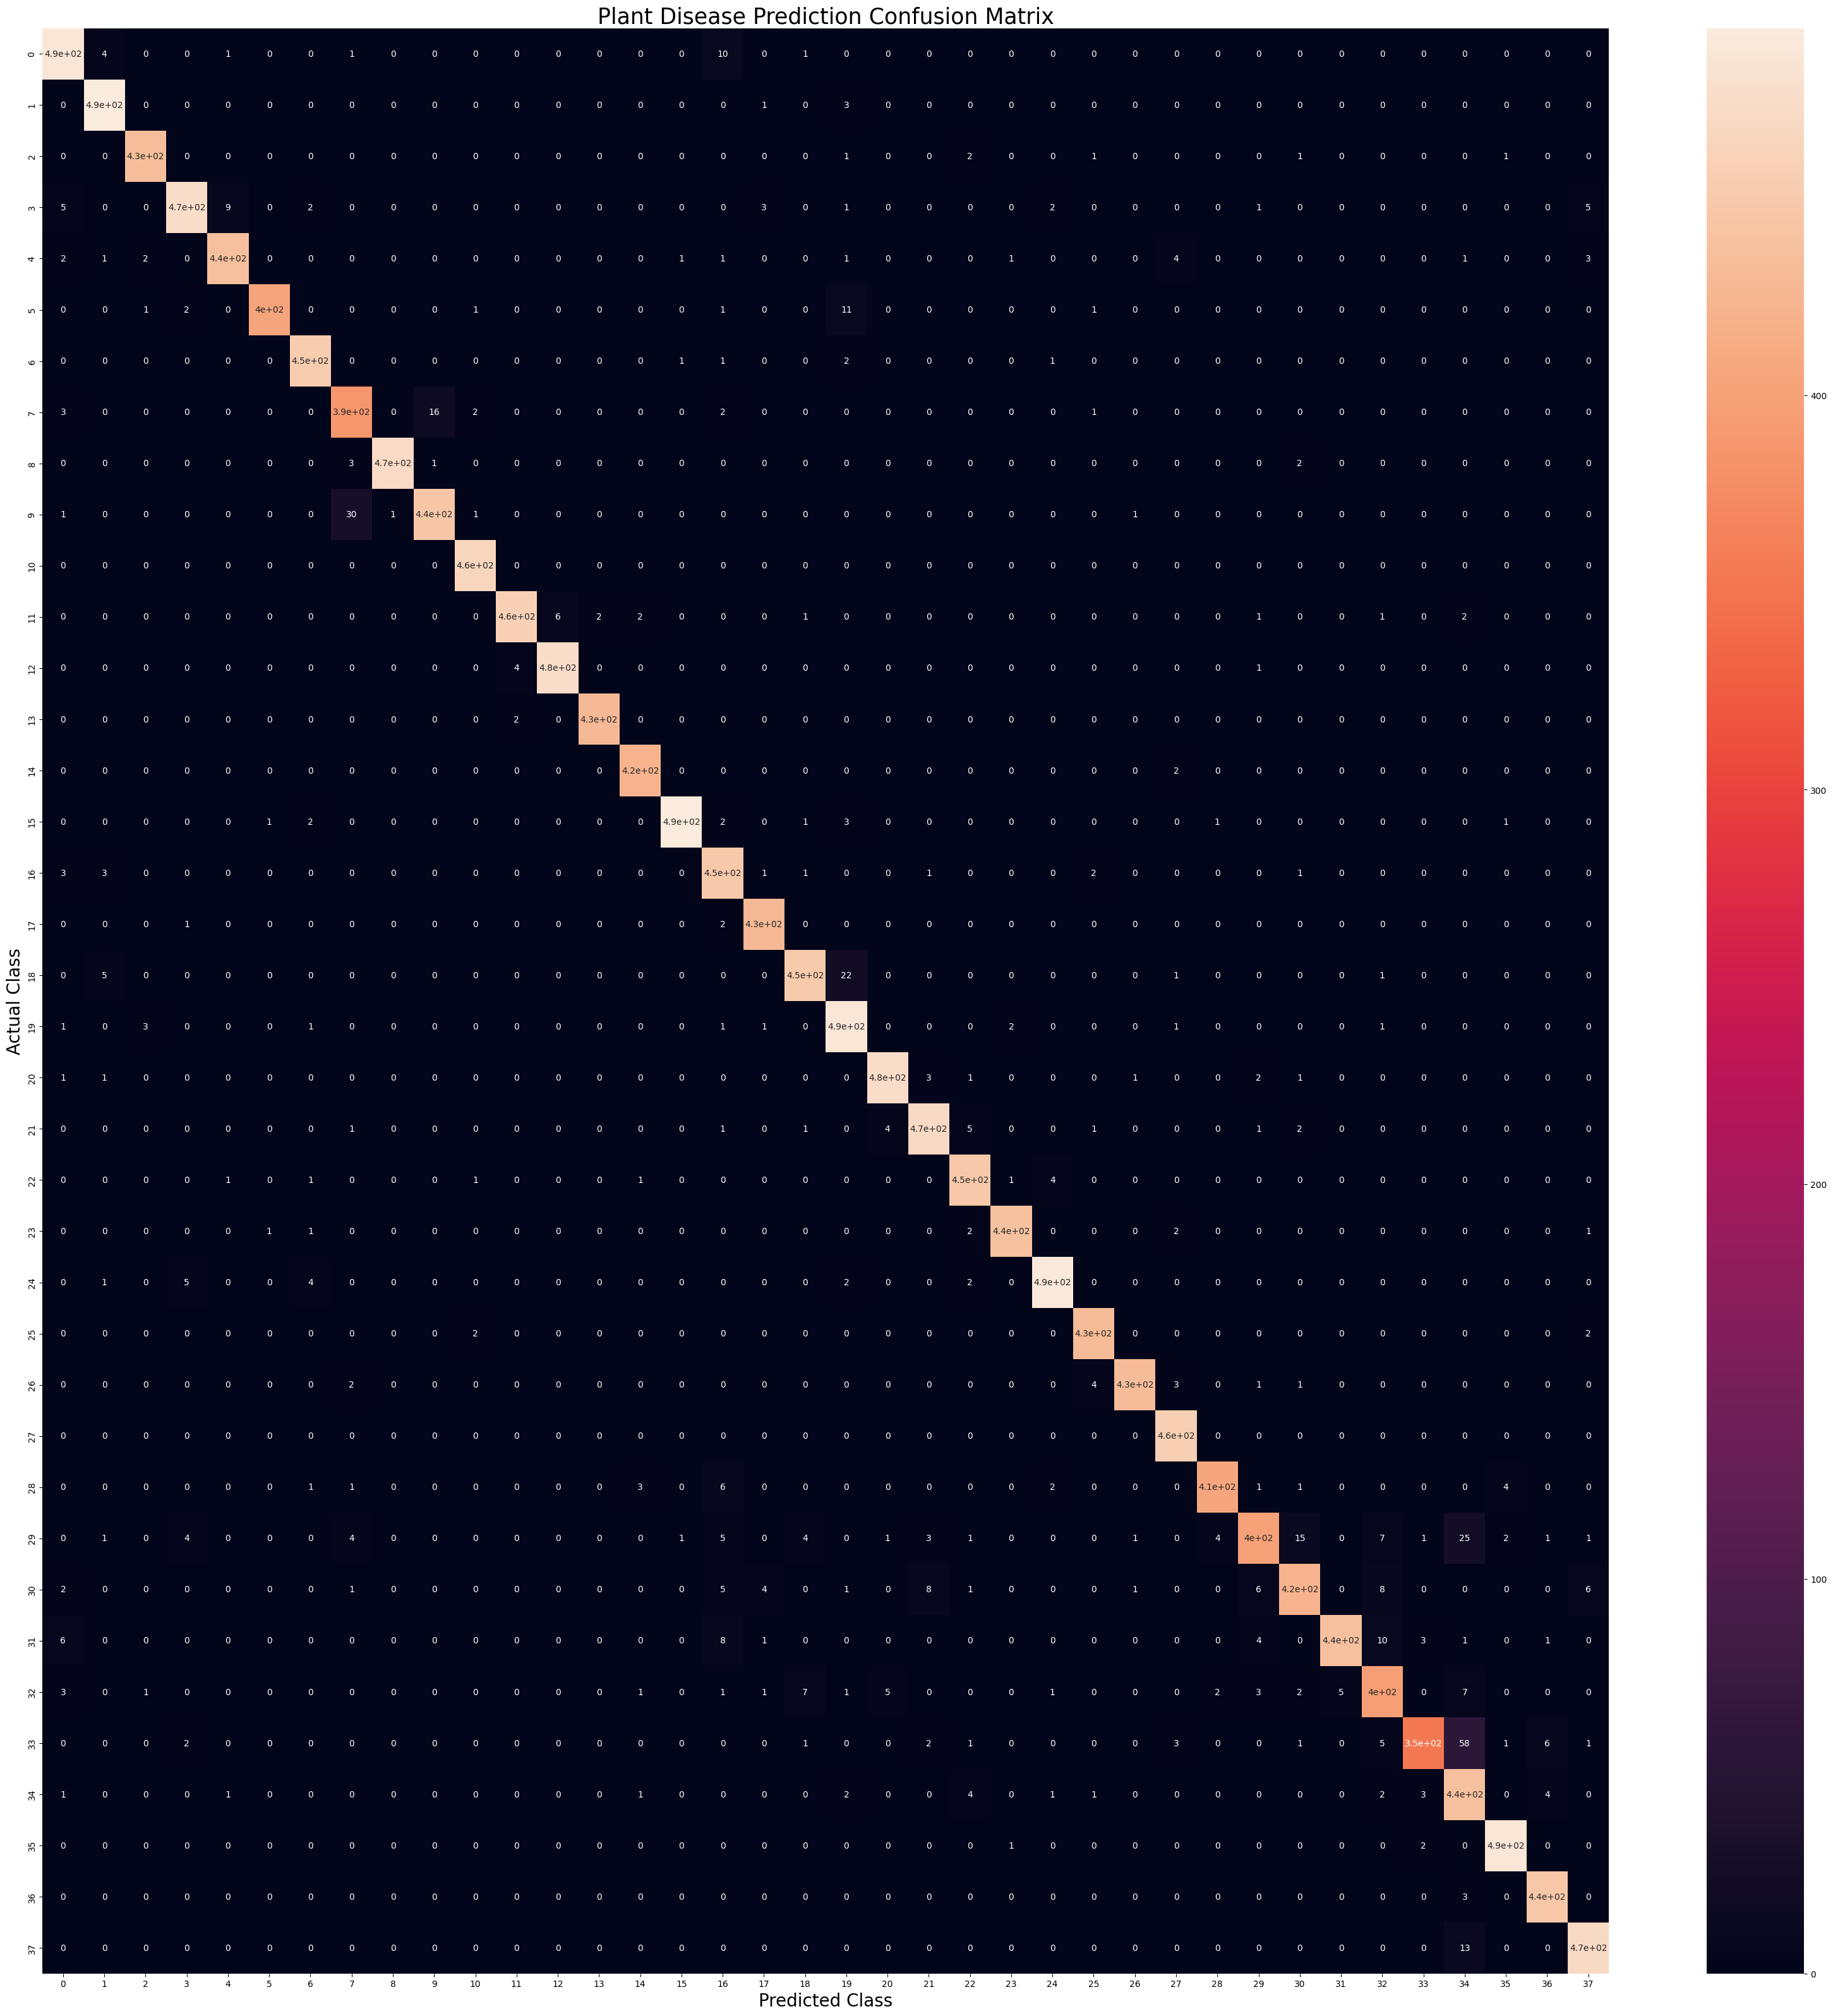

In [47]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True)

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()